In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = [21,65,5,25,60,15,10,60,40,35,48,20,40,25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46,7,50,15,5,30]
y = [65,40,75,70,60,70,55,50,10,5,10,75,20,79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7,65,40,60,50,30]
data = pd.DataFrame({'X':x,'Y':y},index=list(range(1,49)))
data

,X,Y
1,21,65
2,65,40
3,5,75
4,25,70
5,60,60
6,15,70
7,10,55
8,60,50
9,40,10
10,35,5


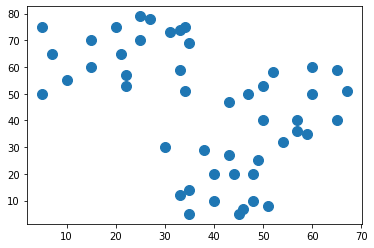

In [3]:
plt.scatter(x,y,s=100)
plt.show()

steps to write K-means algorithm

1. Start with randomly selected K cluster centers. 
2. Calculate the Euclidean distance between each point and cluster center. 
3. Assign each point to the closest cluster center based on the calculated distances. 
4. Compute the mean of all points assigned to each cluster center, and update the new position of each cluster center accordingly. 
5. Repeat steps 2-4 until no more changes occur, or until a maximum number of iterations has been achieved.

In [4]:
# before scaling
data.describe()

,X,Y
count,48.00000,48.000000
mean,38.12500,44.708333
std,16.47645,22.944854
min,5.00000,5.000000
25%,26.50000,26.500000
50%,39.00000,50.000000
75%,50.00000,61.250000
max,67.00000,79.000000


In [5]:
# 1 step to start with randomly selected K cluster centers.
def assign_random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [6]:
centroids = assign_random_centroids(data,3)
centroids

,0,1,2
X,40.0,31.0,60.0
Y,5.0,55.0,75.0


In [7]:
# step 2 Calculate the distance between each point and cluster center. sqrt((x1-x2)**2 + (y1-y2)**2 + ........)

def get_labels_of_data(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    # Return index of first occurrence of minimum over requested axis.
    return distances.idxmin(axis=1)


In [8]:
labels = get_labels_of_data(data,centroids)

In [9]:
def new_centers(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [10]:
def cluster(k):
    max_iterations = 200
    centroid_count = k

    centroids = assign_random_centroids(data, centroid_count)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels_of_data(data, centroids)
        centroids = new_centers(data, labels, centroid_count)
    return centroids,labels

In [11]:
from collections import defaultdict

def plot(k):
    centroids,labels = cluster(k)
    group = defaultdict(list)
    for i,j in enumerate(labels):
        group[j].append(i+1)
    for i in range(k):
        print('group' + ' ' + str(i) + ' = ', *group[i])

    def x_and_y_of_group(label):
        x = []
        y = []
        for i in group[label]:
            x.append(data.iloc[i-1]['X'])
            y.append(data.iloc[i-1]['Y'])
        return x,y

    for i in range(k):
        xx,yy = x_and_y_of_group(i)
        plt.scatter(xx,yy)
        plt.scatter(centroids[i]['X'],centroids[i]['Y'],s=300,marker='+',c='black')


group 0 =  1 3 4 5 6 7 12 14 15 16 17 18 19 20 21 22 23 27 28 31 32 33 44 46 47
group 1 =  2 8 9 10 11 13 24 25 26 29 30 34 35 36 37 38 39 40 41 42 43 45 48


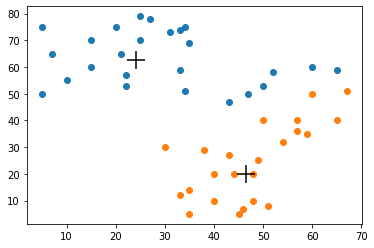

In [12]:
plot(2)

group 0 =  1 3 4 6 7 12 14 16 17 18 19 20 21 22 23 44 46 47
group 1 =  9 10 11 13 34 35 36 37 38 39 40 41 42 43 48
group 2 =  2 5 8 15 24 25 26 27 28 29 30 31 32 33 45


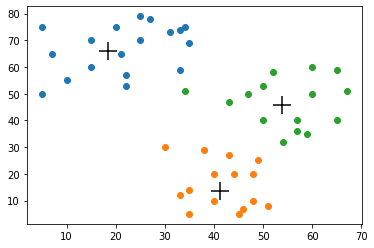

In [13]:
plot(3)

group 0 =  7 16 21 44 46 47
group 1 =  2 5 8 15 24 25 26 27 28 29 30 31 32 33 45
group 2 =  9 10 11 13 34 35 36 37 38 39 40 41 42 43 48
group 3 =  1 3 4 6 12 14 17 18 19 20 22 23


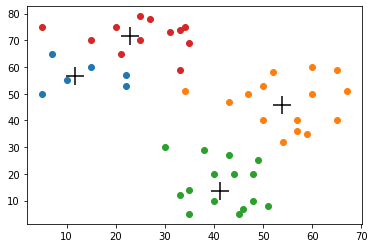

In [14]:
plot(4)